# Define missingness assumptions for (time-series) dataset
In order to resolve missingness, we need to define assumptions how the missingness is created. We encode these assumptions in a MissingDataGraph that we define here.

__Note__: If the available dataset is fully observed, and you want to inject synthetic missingness, please see `prep05_inject_missingness_ts` instead. It also saves the ground truth m_graph. 

In [1]:
%load_ext autoreload
%autoreload 2

### Define paths 

In [2]:
from afa.configurations.utils_ts import specify_default_paths_ts
# which dataset to work on 
dataset_name   = "miiv_test"

# name for of missingness scenario 
miss_scenario  = 'MCAR_1'

# original data paths
paths_gt = specify_default_paths_ts(dataset_name = dataset_name , 
                                    miss_scenario = miss_scenario) 

# new missing data paths
paths_miss = specify_default_paths_ts(dataset_name = dataset_name , 
                                      miss_scenario = miss_scenario) 

# save miss model files afterwards
m_graph_adj_file     = paths_miss['data_dir']  + 'm_graphs/'  + 'm_graph_adjacencies.csv'

# which dataset to work on 
# dataset_name   = "synthetic_1"

# name for of missingness scenario 
# miss_scenario  = 'MCAR_1'

# specifications
# data_dir       = "../../../data/ts/" + dataset_name + "/" + miss_scenario + "/" 
# data_file          = data_dir + dataset_name + '_' + miss_scenario + '_static.csv.gz' 
# temporal_data_file = data_dir + dataset_name + '_' + miss_scenario + '_ts_eav.csv.gz' 
# superfeature_mapping_file = data_dir + 'superfeatures.csv'
# problem_file   = data_dir + 'problem/' + 'problem.yaml'
# afa_problem_files = {
#         'action_file'          : data_dir + 'afa_problem/' + 'acquisition_actions.csv', 
#         'prediction_cost_file' : data_dir + 'afa_problem/' + 'prediction_cost.csv'
#                 }

# new specifications (created in this notebook) 
# m_graph_adj_file      = data_dir  + 'm_graphs/' + 'm_graph_adjacencies.csv'

# reporting
# explanation_file = data_dir  + 'reports/' + 'dataset_description_with_miss_assumption'

## Load dataset with missingness 
At first, we want to load the dataset (and define the problem)

In [3]:
from afa.data_modelling.datasets.data_loader.data_loader_ts import DataLoader_ts

2023-08-07 11:43:07.394795: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-07 11:43:07.484658: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-08-07 11:43:07.484673: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-08-07 11:43:10.381945: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [4]:
data_loader = DataLoader_ts(    data_file                  = paths_gt['data_file'],
                                temporal_data_file         = paths_gt['temporal_data_file'],
                                superfeature_mapping_file = paths_gt['superfeature_mapping_file'],
                                problem_file              = paths_gt['problem_file'],
                                afa_problem_files         = paths_gt['afa_problem_files'],
                                folds_file                = paths_gt['folds_file'])
dataset = data_loader.load() 

Padding sequences: 100%|██████████| 100/100 [00:00<00:00, 1719.13it/s]


## Visualize missingness 
Before specifying assumptions about the missing data process, visualize the missingness

In [13]:
dataset.temporal_feature

array([[[        nan,         nan,         nan, ...,         nan,
          0.8977182 ,         nan],
        [        nan,         nan,         nan, ...,         nan,
         -0.62543726,         nan],
        [        nan,         nan,         nan, ...,         nan,
         -0.59302974,         nan],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
          2.6477265 ,         nan],
        ...,
        [        nan,         nan,         nan, ...,  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


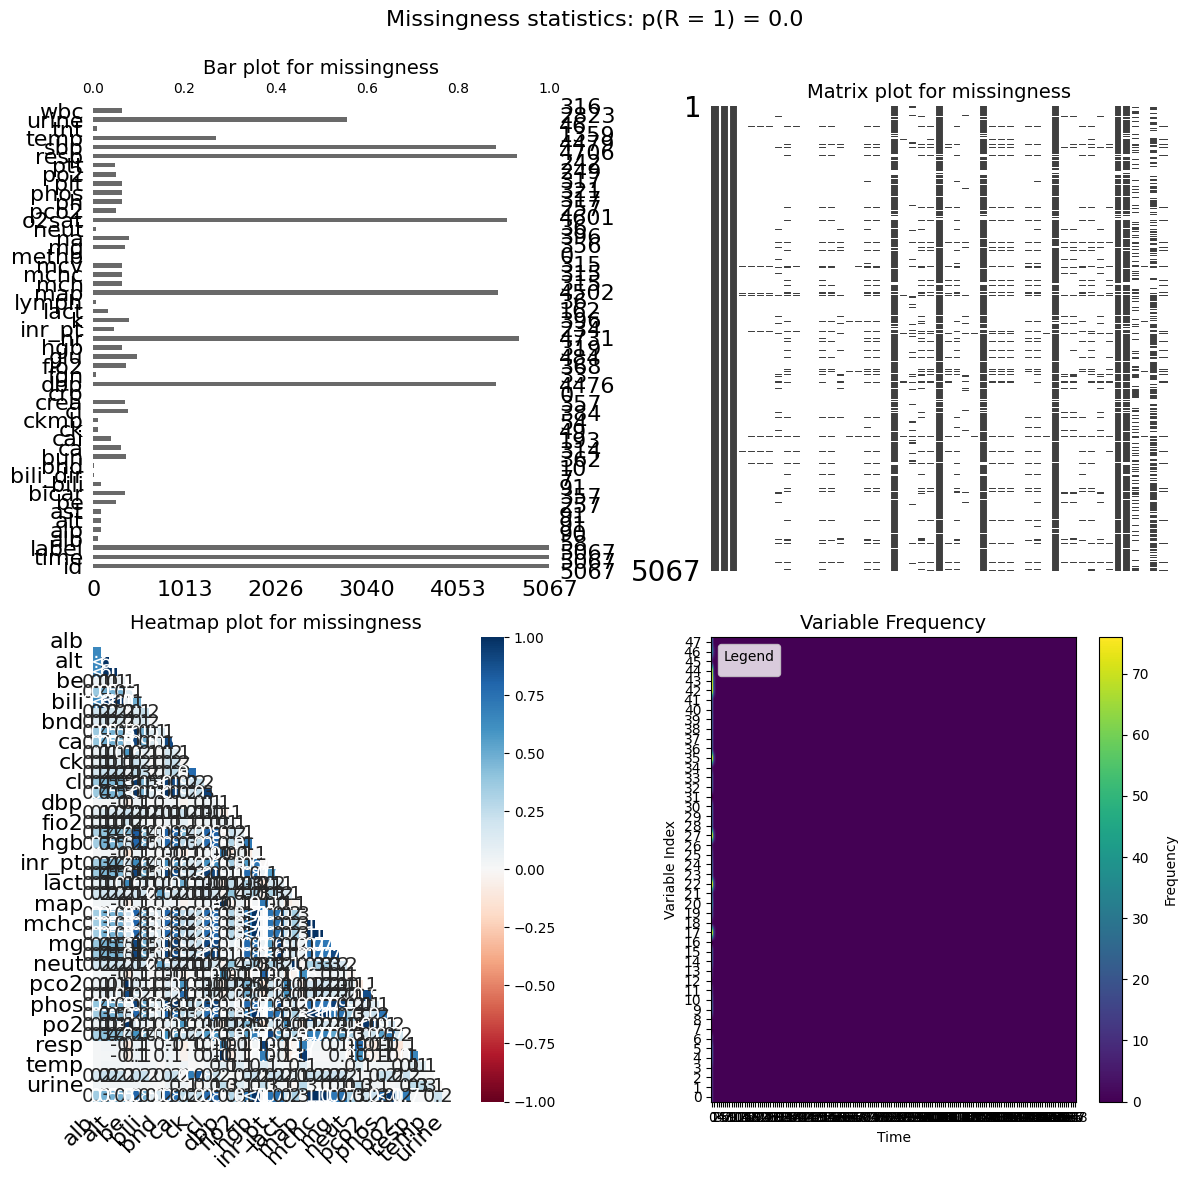

In [15]:
# to do, write code to visualize missingness (e.g. use missingno library) 
fig = dataset.plot_missingness_stats()

## Define missingness assumptions 

#### Option 1: Create missing data assumptions directly via a .csv file
Fill a .csv file containing the edges in the m_graph
- column_names: name of the superfeature missingness indicators (superR) with format 'R_' + superfeature_name
- row_names: name of the features and then name of the superR
- entry(i,j) = 1  
    if node of index i has an arrow to node of column j 

#### Option 2: Define the assumptions here and save the mapping 
Define the adjacency matrix of the m_graph using a pandas df

In [ ]:
from afa.data_modelling.missingness.missing_data_graph.utils import save_m_graph_adjacency_matrix
import pandas as pd

In [ ]:
m_graph_adj = pd.DataFrame([[0, 0], [0, 0]], 
                            index=['X0_ts', 'X1_ts' ], 
                            columns=['R_superX1_ts', 'R_superX2_ts'])

save_m_graph_adjacency_matrix( m_graph_adj , m_graph_adj_file = m_graph_adj_file  )  

#### Option 3 (not recommended): Prepared m_graphs and weights 
Lastly, for specific datasets, the creation can be automatically stored using hard-coded specifications. 

In [ ]:
from afa.configurations.data_settings.define_data_settings_ts import generate_m_graphs_and_weights_ts
m_graph_adj, weights_df = generate_m_graphs_and_weights_ts( dataset_name , 
                                                           miss_scenario ,  
                                                           data_dir = paths_miss['data_dir'],
                                                           m_graph_adj_file = m_graph_adj_file)

## Test by loading missingness model

### Test 1: load missingness model by itself 

In [16]:
from afa.data_modelling.missingness.missing_data_graph.missing_data_graph_ts import MissingDataGraph_ts
from afa.data_modelling.missingness.missing_data_graph.utils import load_m_graph_adjacency_matrix
from afa.data_modelling.missingness.missingness_model import MissingnessModel

In [17]:
m_graph_adj = load_m_graph_adjacency_matrix( m_graph_adj_file)

m_graph = MissingDataGraph_ts(m_graph_adj  = m_graph_adj ) 

In [18]:
# visualize adjacency matrix 
m_graph.m_graph_adj

,R_CBC,R_diff_from_CBC,R_BMP,R_CMP_without_BMP,R_ABG,R_CRP,R_lact,R_sbp,R_ptt,R_inr_pt,...,R_ck,R_map,R_ckmb,R_bili_dir,R_resp,R_tnt,R_phos,R_o2sat,R_bnd,R_sex
age,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sex,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
height,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
weight,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
alb,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
R_fgn,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
R_lact,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
R_sbp,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
R_bnd,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


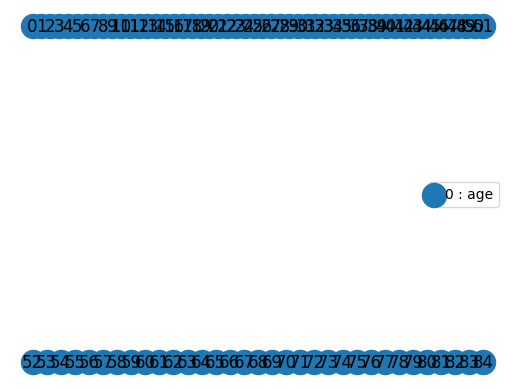

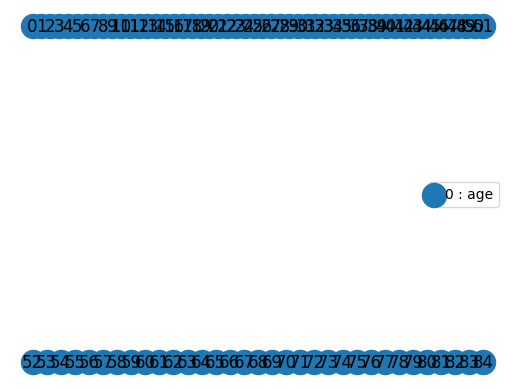

In [19]:
m_graph.plot() 

### Test 2: load missingness model as part of dataset

In [20]:
# define files needed to load missingness model
miss_model_files = {
    'm_graph_adj_file' : m_graph_adj_file, 
    }

In [21]:
data_loader = DataLoader_ts(    data_file                 = paths_gt['data_file'],
                                temporal_data_file        = paths_gt['temporal_data_file'],
                                superfeature_mapping_file = paths_gt['superfeature_mapping_file'],
                                problem_file              = paths_gt['problem_file'],
                                afa_problem_files         = paths_gt['afa_problem_files'],
                                folds_file                = paths_gt['folds_file'],
                                miss_model_files          = miss_model_files)
dataset = data_loader.load() 

Padding sequences: 100%|██████████| 100/100 [00:00<00:00, 1627.80it/s]


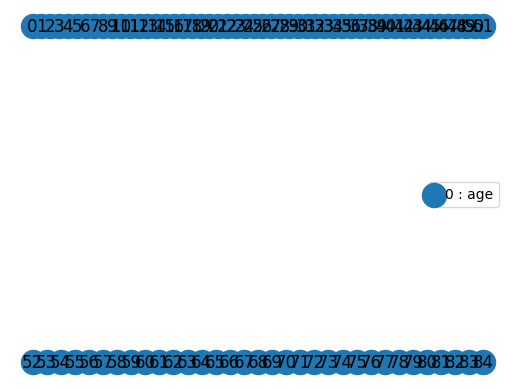

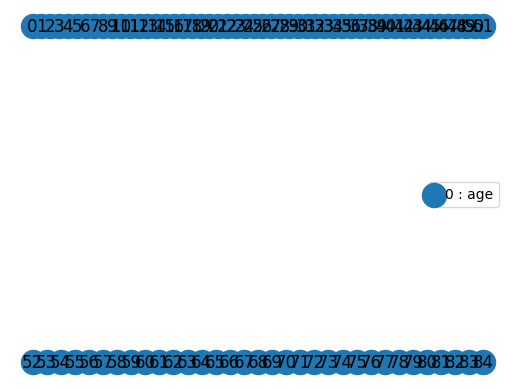

In [22]:
# Visualize the graph
dataset.miss_model.m_graph.plot() 

## Explain the data set and missingness
Store information in reports folder in latex / markdown format that explains the data and the missingness (assumptions)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[Errno 2] No such file or directory: 'pandoc'
Error, but instead of markdown format, saving the latex format into the file "../../../data/ts/miiv_test/MCAR_1/dataset_report.md" . 
Content of file:

\usepackage{longtable}\section{The Dataset}
\\begin{itemize}\n\item Number of data points  : 100
\item Number of features     : 4
\item Number of superfeatures: 4
\end{itemize}
\subparagraph{The Prediction Problem}
online problem: 
 Predict the label: ['label'] 
using the superfeatures: ['age', 'sex', 'height', 'weight'] 
\subparagraph{The Superfeature Mapping}
Superfeatures represent a higher level of features such as images that contain multiple subfeatures (the pixels)that are usually acquired / missing jointly. The following superfeatures were defined: 
\\begin{itemize}\n\item CBC : hgb, mcv, mch, mchc, plt, wbc
\item diff_from_CBC : lymph, neut
\item BMP : glu, bun, bicar, crea, na, k, cl, ca
\item CMP_without_BMP : alb, bili, alp, ast, alt
\item ABG : ph, pco2, po2
\item CRP : crp
\ite

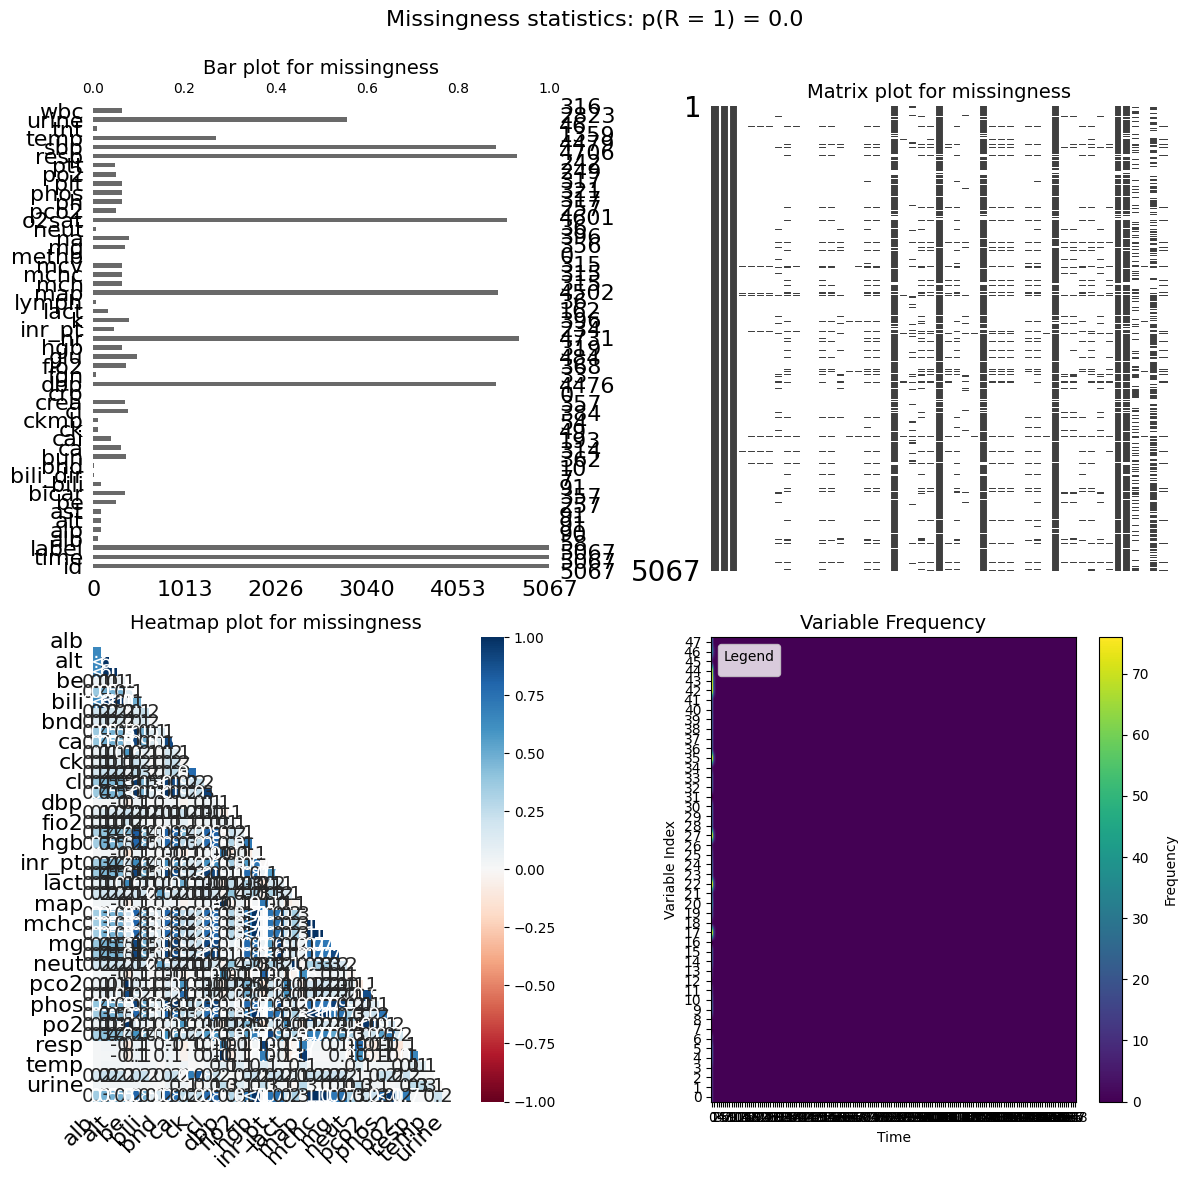

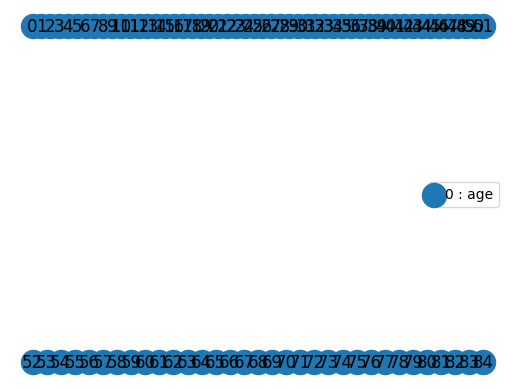

In [23]:
explanation_file = paths_miss['data_dir'] + 'dataset_report'
dataset.explain(file=  explanation_file + '.md', format = 'markdown')